In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
data = pd.read_csv(r'C:\Users\HARSHITA KOTHARI\Downloads\archive\customer_data.csv')

In [23]:
# Select relevant features for clustering
X = data[['age', 'income', 'purchase_amount', 'promotion_usage', 'satisfaction_score']]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

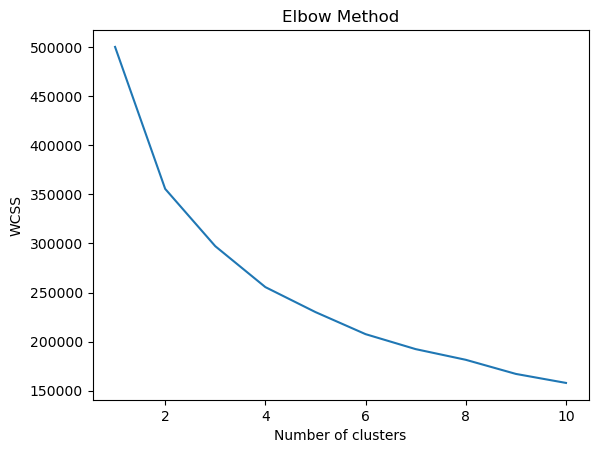

In [26]:
# Plot the Elbow method results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# From the Elbow method, choose the optimal number of clusters
# In this case, let's say it's 4
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\HARSHITA KOTHARI\OneDrive\Desktop\anaconda jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Add cluster labels to the original dataframe
data['Cluster'] = clusters

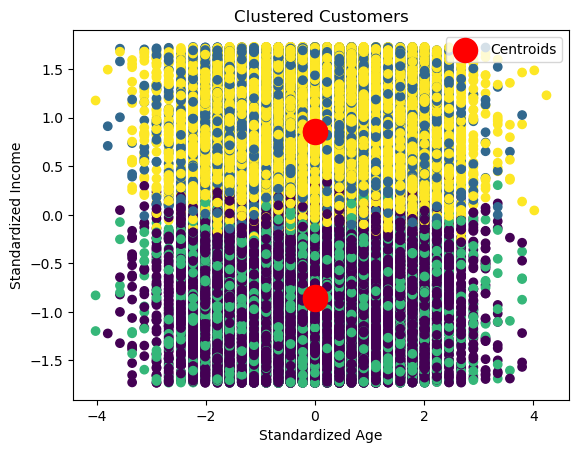

In [32]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clustered Customers')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Income')
plt.legend()
plt.show()

In [34]:
# Optionally, you can analyze the characteristics of each cluster by examining the cluster centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Age', 'Income', 'Purchase Amount', 'Promotion Usage', 'Satisfaction Score'])
print(cluster_df)

         Age        Income  Purchase Amount  Promotion Usage  \
0  30.004362  16445.202317      5639.738855    -5.329071e-15   
1  30.030309  38662.329363     13654.105949     1.000000e+00   
2  30.002472  16294.558822      5594.349522     1.000000e+00   
3  29.990669  38795.659704     13702.358901    -4.996004e-15   

   Satisfaction Score  
0            5.007704  
1            5.028390  
2            4.991783  
3            5.011180  
